In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
import seaborn as sns
from keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
print(tf.__version__)

2.1.0


Using TensorFlow backend.


In [2]:
data = pd.read_csv('bitcoin_data.csv')
data.reset_index()

,index,Date,High,Low,Last,Bid,Ask,Volume,VWAP
0,0,2014-04-15,515.00,453.16,499.01,500.01,505.04,28535.844106,491.41
1,1,2014-04-16,548.00,494.02,534.00,535.01,536.00,31159.941300,520.21
2,2,2014-04-17,537.24,481.63,506.52,504.70,505.38,21126.375080,504.83
3,3,2014-04-18,508.43,470.00,487.00,484.14,487.00,11879.484756,485.72
4,4,2014-04-19,507.43,472.81,504.74,504.74,505.00,10262.195861,492.22
...,...,...,...,...,...,...,...,...,...
2378,2378,2020-11-14,16494.52,15970.33,16335.58,16335.58,16339.27,7842.488826,16279.18
2379,2379,2020-11-15,16341.89,15715.10,16086.34,16087.77,16094.81,5046.326705,15982.98
2380,2380,2020-11-16,16170.00,15786.46,15975.49,15969.41,15973.22,3226.276565,15979.39
2381,2381,2020-11-17,16894.93,15875.50,16724.62,16719.84,16729.63,7511.143605,16409.99


In [3]:
data = data.drop(columns='Date')


In [4]:
test = data.tail(20)
test

,High,Low,Last,Bid,Ask,Volume,VWAP
2363,13650.00,12993.00,13411.86,13413.35,13416.39,8948.197381,13318.04
2364,13675.56,13129.26,13577.60,13572.18,13581.82,8980.671631,13404.59
2365,14100.00,13420.97,13879.14,13878.39,13887.22,6394.173016,13762.10
2366,13907.47,13629.31,13711.21,13700.59,13711.21,2465.795017,13766.72
2367,13842.50,13220.00,13563.72,13570.69,13578.98,7062.704712,13545.15
2368,14083.76,13287.70,14041.58,14030.89,14041.58,7226.516356,13633.01
2369,14277.50,13520.87,14160.59,14162.68,14171.73,10925.676805,13908.16
2370,15770.58,14100.00,15605.04,15603.49,15608.32,18422.631860,14937.25
2371,15968.98,15196.01,15598.09,15598.10,15603.23,13479.467068,15570.55
2372,15778.60,14351.00,14838.97,14832.01,14842.70,10933.924192,15076.99


In [5]:
High = test.High.values
Low = test.Low.values
Volume = test.Volume.values
Last = test.Last.values

In [6]:
X = []
y = []

for i in range(len(High)):
    row = []
    yrow = []
    row.append(High[i])
    row.append(Low[i])
#     row.append(Volume[i])
    yrow.append(Last[i])
    X.append(row)
    y.append(yrow)
X = np.array(X)
y = np.array(y)
X

array([[13650.  , 12993.  ],
       [13675.56, 13129.26],
       [14100.  , 13420.97],
       [13907.47, 13629.31],
       [13842.5 , 13220.  ],
       [14083.76, 13287.7 ],
       [14277.5 , 13520.87],
       [15770.58, 14100.  ],
       [15968.98, 15196.01],
       [15778.6 , 14351.  ],
       [15664.9 , 14727.19],
       [15854.48, 14824.66],
       [15482.76, 15092.47],
       [15991.01, 15290.85],
       [16369.99, 15481.  ],
       [16494.52, 15970.33],
       [16341.89, 15715.1 ],
       [16170.  , 15786.46],
       [16894.93, 15875.5 ],
       [17868.  , 16570.  ]])

In [7]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler




In [8]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

In [9]:
horsepower = np.array(X_train)
horsepower2 = np.array(X_train)
horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(horsepower)
horsepower_normalizer2 = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer2.adapt(horsepower2)

In [10]:
# # input_layer = Input(shape=(X.shape[1],))
# dense_layer_1 = Dense(100, input_shape=(X.shape[1],), activation='relu')
# dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
# dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
# output = Dense(1)

# model = Model([
#     Dense(100, input_dim=X.shape[1], activation='relu'),
#     Dense(50, activation='relu'),
#     Dense(25, activation='relu'),
#     Dense(units=1, activation='softmax')
# ])
# model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

horsepower_model = tf.keras.Sequential([
#     horsepower_normalizer,
    layers.Dense(50, activation='relu', input_dim=2),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(units=1)
])


In [11]:
horsepower_model.predict(X_test[:10])

array([[-298.51135],
       [-250.56612],
       [-307.97375],
       [-288.61554]], dtype=float32)

In [12]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='mean_absolute_error', metrics=['accuracy'])

In [13]:
%%time
history = horsepower_model.fit(
    X_train, y_train,
    epochs=700,
    # suppress logging
    verbose=2,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Train on 12 samples, validate on 4 samples
Epoch 1/700
12/12 - 0s - loss: 15353.7256 - accuracy: 0.0000e+00 - val_loss: 14933.5234 - val_accuracy: 0.0000e+00
Epoch 2/700
12/12 - 0s - loss: 15317.3438 - accuracy: 0.0000e+00 - val_loss: 14898.2754 - val_accuracy: 0.0000e+00
Epoch 3/700
12/12 - 0s - loss: 15280.9014 - accuracy: 0.0000e+00 - val_loss: 14866.2607 - val_accuracy: 0.0000e+00
Epoch 4/700
12/12 - 0s - loss: 15245.8643 - accuracy: 0.0000e+00 - val_loss: 14834.8359 - val_accuracy: 0.0000e+00
Epoch 5/700
12/12 - 0s - loss: 15212.9609 - accuracy: 0.0000e+00 - val_loss: 14802.8887 - val_accuracy: 0.0000e+00
Epoch 6/700
12/12 - 0s - loss: 15179.9424 - accuracy: 0.0000e+00 - val_loss: 14770.4727 - val_accuracy: 0.0000e+00
Epoch 7/700
12/12 - 0s - loss: 15146.9141 - accuracy: 0.0000e+00 - val_loss: 14737.8623 - val_accuracy: 0.0000e+00
Epoch 8/700
12/12 - 0s - loss: 15113.7969 - accuracy: 0.0000e+00 - val_loss: 14705.1006 - val_accuracy: 0.0000e+00
Epoch 9/700
12/12 - 0s - loss: 15080.

Epoch 72/700
12/12 - 0s - loss: 13081.8799 - accuracy: 0.0000e+00 - val_loss: 12689.4072 - val_accuracy: 0.0000e+00
Epoch 73/700
12/12 - 0s - loss: 13043.6982 - accuracy: 0.0000e+00 - val_loss: 12651.2598 - val_accuracy: 0.0000e+00
Epoch 74/700
12/12 - 0s - loss: 13004.4424 - accuracy: 0.0000e+00 - val_loss: 12611.9395 - val_accuracy: 0.0000e+00
Epoch 75/700
12/12 - 0s - loss: 12964.3164 - accuracy: 0.0000e+00 - val_loss: 12571.5078 - val_accuracy: 0.0000e+00
Epoch 76/700
12/12 - 0s - loss: 12923.3545 - accuracy: 0.0000e+00 - val_loss: 12530.0557 - val_accuracy: 0.0000e+00
Epoch 77/700
12/12 - 0s - loss: 12881.5596 - accuracy: 0.0000e+00 - val_loss: 12487.3857 - val_accuracy: 0.0000e+00
Epoch 78/700
12/12 - 0s - loss: 12838.8828 - accuracy: 0.0000e+00 - val_loss: 12443.6689 - val_accuracy: 0.0000e+00
Epoch 79/700
12/12 - 0s - loss: 12795.4033 - accuracy: 0.0000e+00 - val_loss: 12399.0820 - val_accuracy: 0.0000e+00
Epoch 80/700
12/12 - 0s - loss: 12751.1875 - accuracy: 0.0000e+00 - val_

Epoch 143/700
12/12 - 0s - loss: 8695.8740 - accuracy: 0.0000e+00 - val_loss: 8303.9141 - val_accuracy: 0.0000e+00
Epoch 144/700
12/12 - 0s - loss: 8601.7549 - accuracy: 0.0000e+00 - val_loss: 8210.0996 - val_accuracy: 0.0000e+00
Epoch 145/700
12/12 - 0s - loss: 8506.2275 - accuracy: 0.0000e+00 - val_loss: 8114.7646 - val_accuracy: 0.0000e+00
Epoch 146/700
12/12 - 0s - loss: 8409.4297 - accuracy: 0.0000e+00 - val_loss: 8017.9932 - val_accuracy: 0.0000e+00
Epoch 147/700
12/12 - 0s - loss: 8311.3438 - accuracy: 0.0000e+00 - val_loss: 7919.5039 - val_accuracy: 0.0000e+00
Epoch 148/700
12/12 - 0s - loss: 8211.7305 - accuracy: 0.0000e+00 - val_loss: 7819.3652 - val_accuracy: 0.0000e+00
Epoch 149/700
12/12 - 0s - loss: 8110.7285 - accuracy: 0.0000e+00 - val_loss: 7717.6621 - val_accuracy: 0.0000e+00
Epoch 150/700
12/12 - 0s - loss: 8008.2598 - accuracy: 0.0000e+00 - val_loss: 7614.7178 - val_accuracy: 0.0000e+00
Epoch 151/700
12/12 - 0s - loss: 7904.4414 - accuracy: 0.0000e+00 - val_loss: 75

Epoch 215/700
12/12 - 0s - loss: 191.8135 - accuracy: 0.0000e+00 - val_loss: 67.8997 - val_accuracy: 0.0000e+00
Epoch 216/700
12/12 - 0s - loss: 211.4971 - accuracy: 0.0000e+00 - val_loss: 95.2219 - val_accuracy: 0.0000e+00
Epoch 217/700
12/12 - 0s - loss: 257.1393 - accuracy: 0.0000e+00 - val_loss: 109.0132 - val_accuracy: 0.0000e+00
Epoch 218/700
12/12 - 0s - loss: 279.0787 - accuracy: 0.0000e+00 - val_loss: 105.8408 - val_accuracy: 0.0000e+00
Epoch 219/700
12/12 - 0s - loss: 273.9949 - accuracy: 0.0000e+00 - val_loss: 87.8735 - val_accuracy: 0.0000e+00
Epoch 220/700
12/12 - 0s - loss: 245.3433 - accuracy: 0.0000e+00 - val_loss: 67.7786 - val_accuracy: 0.0000e+00
Epoch 221/700
12/12 - 0s - loss: 205.1767 - accuracy: 0.0000e+00 - val_loss: 76.9460 - val_accuracy: 0.0000e+00
Epoch 222/700
12/12 - 0s - loss: 191.3284 - accuracy: 0.0000e+00 - val_loss: 137.6584 - val_accuracy: 0.0000e+00
Epoch 223/700
12/12 - 0s - loss: 197.1332 - accuracy: 0.0000e+00 - val_loss: 191.6660 - val_accuracy:

Epoch 288/700
12/12 - 0s - loss: 189.8770 - accuracy: 0.0000e+00 - val_loss: 66.5969 - val_accuracy: 0.0000e+00
Epoch 289/700
12/12 - 0s - loss: 189.7690 - accuracy: 0.0000e+00 - val_loss: 66.6145 - val_accuracy: 0.0000e+00
Epoch 290/700
12/12 - 0s - loss: 190.1761 - accuracy: 0.0000e+00 - val_loss: 66.5872 - val_accuracy: 0.0000e+00
Epoch 291/700
12/12 - 0s - loss: 189.9091 - accuracy: 0.0000e+00 - val_loss: 66.5193 - val_accuracy: 0.0000e+00
Epoch 292/700
12/12 - 0s - loss: 189.8435 - accuracy: 0.0000e+00 - val_loss: 66.4648 - val_accuracy: 0.0000e+00
Epoch 293/700
12/12 - 0s - loss: 189.9707 - accuracy: 0.0000e+00 - val_loss: 66.4204 - val_accuracy: 0.0000e+00
Epoch 294/700
12/12 - 0s - loss: 190.0605 - accuracy: 0.0000e+00 - val_loss: 66.3845 - val_accuracy: 0.0000e+00
Epoch 295/700
12/12 - 0s - loss: 190.1178 - accuracy: 0.0000e+00 - val_loss: 66.4482 - val_accuracy: 0.0000e+00
Epoch 296/700
12/12 - 0s - loss: 190.1453 - accuracy: 0.0000e+00 - val_loss: 66.6875 - val_accuracy: 0.0

Epoch 362/700
12/12 - 0s - loss: 188.9511 - accuracy: 0.0000e+00 - val_loss: 65.4214 - val_accuracy: 0.0000e+00
Epoch 363/700
12/12 - 0s - loss: 188.8717 - accuracy: 0.0000e+00 - val_loss: 65.4011 - val_accuracy: 0.0000e+00
Epoch 364/700
12/12 - 0s - loss: 188.8653 - accuracy: 0.0000e+00 - val_loss: 65.3914 - val_accuracy: 0.0000e+00
Epoch 365/700
12/12 - 0s - loss: 188.8324 - accuracy: 0.0000e+00 - val_loss: 65.3867 - val_accuracy: 0.0000e+00
Epoch 366/700
12/12 - 0s - loss: 189.0271 - accuracy: 0.0000e+00 - val_loss: 65.3337 - val_accuracy: 0.0000e+00
Epoch 367/700
12/12 - 0s - loss: 188.8849 - accuracy: 0.0000e+00 - val_loss: 65.2917 - val_accuracy: 0.0000e+00
Epoch 368/700
12/12 - 0s - loss: 188.9548 - accuracy: 0.0000e+00 - val_loss: 65.2603 - val_accuracy: 0.0000e+00
Epoch 369/700
12/12 - 0s - loss: 188.9916 - accuracy: 0.0000e+00 - val_loss: 65.2375 - val_accuracy: 0.0000e+00
Epoch 370/700
12/12 - 0s - loss: 188.9968 - accuracy: 0.0000e+00 - val_loss: 65.2229 - val_accuracy: 0.0

Epoch 436/700
12/12 - 0s - loss: 188.2467 - accuracy: 0.0000e+00 - val_loss: 64.0063 - val_accuracy: 0.0000e+00
Epoch 437/700
12/12 - 0s - loss: 188.1781 - accuracy: 0.0000e+00 - val_loss: 64.0107 - val_accuracy: 0.0000e+00
Epoch 438/700
12/12 - 0s - loss: 188.0862 - accuracy: 0.0000e+00 - val_loss: 64.0217 - val_accuracy: 0.0000e+00
Epoch 439/700
12/12 - 0s - loss: 187.9728 - accuracy: 0.0000e+00 - val_loss: 64.0371 - val_accuracy: 0.0000e+00
Epoch 440/700
12/12 - 0s - loss: 187.8409 - accuracy: 0.0000e+00 - val_loss: 64.0586 - val_accuracy: 0.0000e+00
Epoch 441/700
12/12 - 0s - loss: 188.4969 - accuracy: 0.0000e+00 - val_loss: 64.0225 - val_accuracy: 0.0000e+00
Epoch 442/700
12/12 - 0s - loss: 188.1294 - accuracy: 0.0000e+00 - val_loss: 63.9358 - val_accuracy: 0.0000e+00
Epoch 443/700
12/12 - 0s - loss: 187.9506 - accuracy: 0.0000e+00 - val_loss: 63.8630 - val_accuracy: 0.0000e+00
Epoch 444/700
12/12 - 0s - loss: 188.1141 - accuracy: 0.0000e+00 - val_loss: 63.8042 - val_accuracy: 0.0

Epoch 510/700
12/12 - 0s - loss: 187.1925 - accuracy: 0.0000e+00 - val_loss: 62.5508 - val_accuracy: 0.0000e+00
Epoch 511/700
12/12 - 0s - loss: 187.0582 - accuracy: 0.0000e+00 - val_loss: 62.5718 - val_accuracy: 0.0000e+00
Epoch 512/700
12/12 - 0s - loss: 186.9036 - accuracy: 0.0000e+00 - val_loss: 62.5979 - val_accuracy: 0.0000e+00
Epoch 513/700
12/12 - 0s - loss: 186.7668 - accuracy: 0.0000e+00 - val_loss: 62.5605 - val_accuracy: 0.0000e+00
Epoch 514/700
12/12 - 0s - loss: 186.7719 - accuracy: 0.0000e+00 - val_loss: 62.5339 - val_accuracy: 0.0000e+00
Epoch 515/700
12/12 - 0s - loss: 186.7728 - accuracy: 0.0000e+00 - val_loss: 62.5188 - val_accuracy: 0.0000e+00
Epoch 516/700
12/12 - 0s - loss: 186.7419 - accuracy: 0.0000e+00 - val_loss: 62.5105 - val_accuracy: 0.0000e+00
Epoch 517/700
12/12 - 0s - loss: 186.6812 - accuracy: 0.0000e+00 - val_loss: 62.5132 - val_accuracy: 0.0000e+00
Epoch 518/700
12/12 - 0s - loss: 187.0736 - accuracy: 0.0000e+00 - val_loss: 62.4521 - val_accuracy: 0.0

Epoch 584/700
12/12 - 0s - loss: 185.6927 - accuracy: 0.0000e+00 - val_loss: 60.9775 - val_accuracy: 0.0000e+00
Epoch 585/700
12/12 - 0s - loss: 185.7709 - accuracy: 0.0000e+00 - val_loss: 60.9404 - val_accuracy: 0.0000e+00
Epoch 586/700
12/12 - 0s - loss: 185.8050 - accuracy: 0.0000e+00 - val_loss: 60.9133 - val_accuracy: 0.0000e+00
Epoch 587/700
12/12 - 0s - loss: 185.8003 - accuracy: 0.0000e+00 - val_loss: 60.8989 - val_accuracy: 0.0000e+00
Epoch 588/700
12/12 - 0s - loss: 185.7608 - accuracy: 0.0000e+00 - val_loss: 60.8918 - val_accuracy: 0.0000e+00
Epoch 589/700
12/12 - 0s - loss: 185.6901 - accuracy: 0.0000e+00 - val_loss: 60.8940 - val_accuracy: 0.0000e+00
Epoch 590/700
12/12 - 0s - loss: 185.5903 - accuracy: 0.0000e+00 - val_loss: 60.9058 - val_accuracy: 0.0000e+00
Epoch 591/700
12/12 - 0s - loss: 185.5382 - accuracy: 0.0000e+00 - val_loss: 60.8474 - val_accuracy: 0.0000e+00
Epoch 592/700
12/12 - 0s - loss: 185.5616 - accuracy: 0.0000e+00 - val_loss: 60.8037 - val_accuracy: 0.0

Epoch 658/700
12/12 - 0s - loss: 185.2240 - accuracy: 0.0000e+00 - val_loss: 63.9053 - val_accuracy: 0.0000e+00
Epoch 659/700
12/12 - 0s - loss: 185.1446 - accuracy: 0.0000e+00 - val_loss: 62.1511 - val_accuracy: 0.0000e+00
Epoch 660/700
12/12 - 0s - loss: 185.0387 - accuracy: 0.0000e+00 - val_loss: 59.7551 - val_accuracy: 0.0000e+00
Epoch 661/700
12/12 - 0s - loss: 184.9152 - accuracy: 0.0000e+00 - val_loss: 59.0239 - val_accuracy: 0.0000e+00
Epoch 662/700
12/12 - 0s - loss: 184.7664 - accuracy: 0.0000e+00 - val_loss: 59.0481 - val_accuracy: 0.0000e+00
Epoch 663/700
12/12 - 0s - loss: 184.6011 - accuracy: 0.0000e+00 - val_loss: 59.0779 - val_accuracy: 0.0000e+00
Epoch 664/700
12/12 - 0s - loss: 184.4243 - accuracy: 0.0000e+00 - val_loss: 59.1116 - val_accuracy: 0.0000e+00
Epoch 665/700
12/12 - 0s - loss: 184.2250 - accuracy: 0.0000e+00 - val_loss: 59.1516 - val_accuracy: 0.0000e+00
Epoch 666/700
12/12 - 0s - loss: 184.5780 - accuracy: 0.0000e+00 - val_loss: 59.1135 - val_accuracy: 0.0

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
695,184.010986,0.0,58.284424,0.0,695
696,183.649979,0.0,58.192627,0.0,696
697,183.844803,0.0,58.118164,0.0,697
698,183.981613,0.0,58.059814,0.0,698
699,184.064941,0.0,58.017090,0.0,699


In [15]:
predict = horsepower_model.predict(X)
predict

array([[13399.166 ],
       [13482.966 ],
       [13840.691 ],
       [13857.1045],
       [13611.081 ],
       [13762.957 ],
       [13978.702 ],
       [14989.337 ],
       [15673.184 ],
       [15129.099 ],
       [15279.999 ],
       [15421.147 ],
       [15384.357 ],
       [15733.555 ],
       [16016.083 ],
       [16332.808 ],
       [16125.317 ],
       [16079.841 ],
       [16475.389 ],
       [17305.123 ]], dtype=float32)

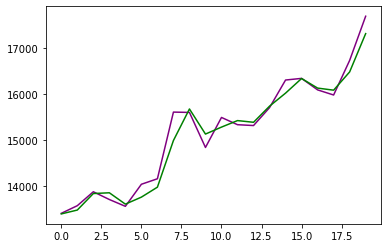

In [16]:
test_plt = test['Last'].reset_index().drop(columns='index')
plt.plot(test_plt, c='purple')
plt.plot(predict, c='g')